In [26]:
# load useful libraries
library(data.table)
library(ggplot2)
library(qvalue)

In [27]:
# Rare Variant results
saige_dir = "/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/from_wei/Feb24/"
rv_file = paste0(saige_dir, "all_cis_rare_with_dTSS_weights.results.txt")
df = as.data.frame(fread(rv_file))

In [28]:
# extract unique cell types
celltypes = unique(df$celltype)
length(celltypes)

[1] 14

In [29]:
df_rv = df[df$Group == "Cauchy",]
df_rv$gene = df_rv$Region
df_rv$qv = qvalue(df_rv$Pvalue)$qvalues
head(df_rv)

,celltype,Region,Group,min_MAF,max_MAF,Weight,Pvalue,Pvalue_ACATV,Pvalue_SKATO,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,Number_rare,Number_ultra_rare,gene,qv
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>
4,Plasma,A1BG,Cauchy,NA,NA,NA,0.7907711,0.6200851,NA,0.8405194,0.8278134,NA,NA,NA,NA,NA,A1BG,0.9981279
8,Plasma,AAAS,Cauchy,NA,NA,NA,0.6539804,0.8087405,NA,0.3547883,0.6738523,NA,NA,NA,NA,NA,AAAS,0.9981279
12,Plasma,AACS,Cauchy,NA,NA,NA,0.9127562,0.3272792,NA,0.3672272,0.9728973,NA,NA,NA,NA,NA,AACS,0.9981279
16,Plasma,AAED1,Cauchy,NA,NA,NA,0.9002482,0.5393262,NA,0.9627107,0.6803753,NA,NA,NA,NA,NA,AAED1,0.9981279
20,Plasma,AAGAB,Cauchy,NA,NA,NA,0.8099287,0.6378124,NA,0.9163681,0.5725483,NA,NA,NA,NA,NA,AAGAB,0.9981279
24,Plasma,AAK1,Cauchy,NA,NA,NA,0.6598493,0.6010894,NA,0.5731734,0.7629241,NA,NA,NA,NA,NA,AAK1,0.9981279


In [30]:
# Common Variant results
cv_file = paste0(saige_dir, "allcelltype_CauchyPval_cis_MAFge0.05.txt.qvalue.lt0.05.txt.05")
df_cv = as.data.frame(fread(cv_file))
colnames(df_cv) = c("celltype","gene","cauchy_pval","qval")
head(df_cv)

,celltype,gene,cauchy_pval,qval
,<chr>,<chr>,<dbl>,<dbl>
1,B_IN,A1BG,1.709470e-03,2.049683e-02
2,B_IN,ABCA1,6.319983e-09,1.875082e-07
3,B_IN,ABCB4,1.094940e-03,1.395162e-02
4,B_IN,ABHD8,2.330217e-03,2.678102e-02
5,B_IN,ABRACL,2.220205e-05,3.998992e-04
6,B_IN,AC000003.2,7.013919e-05,1.137337e-03


In [31]:
nrow(df_rv[df_rv$qv < 0.05,])
length(unique(df_rv[df_rv$qv < 0.05,"Region"]))

[1] 5541

[1] 2317

In [32]:
df_to_plot = data.frame()
for (celltype in celltypes){
    df_new = data.frame(celltype = celltype,
                        n_CV_eGenes = nrow(df_cv[df_cv$celltype == celltype & df_cv$qval < 0.05,]),
                        n_RV_eGenes = nrow(df_rv[df_rv$celltype == celltype & df_rv$qv < 0.05,]))
    df_to_plot = rbind(df_to_plot, df_new)
}
df_to_plot

celltype,n_CV_eGenes,n_RV_eGenes
<chr>,<int>,<int>
Plasma,123,35
NK,2406,747
NK_R,231,87
Mono_NC,722,187
Mono_C,932,276
DC,280,109
CD8_S100B,671,216
CD8_ET,2558,796
CD4_SOX4,55,27


In [33]:
min(df_to_plot$n_RV_eGenes/df_to_plot$n_CV_eGenes)
max(df_to_plot$n_RV_eGenes/df_to_plot$n_CV_eGenes)
mean(df_to_plot$n_RV_eGenes/df_to_plot$n_CV_eGenes)

[1] 0.2590028

[1] 0.4909091

[1] 0.329721

In [34]:
sum(df_to_plot$n_RV_eGenes)
sum(df_to_plot$n_CV_eGenes)

[1] 5541

[1] 17215

In [35]:
df_to_plot$celltype <- factor(df_to_plot$celltype, 
                                    levels = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK",
                                               "NK_R","Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))
df_colours = data.frame(colours = c("#882E72","#B178A6","#D6C1DE","#1965B0","#5289C7","#7BAFDE","#4EB265",
                                    "#90C987","#CAE0AB","#F7EE55","#F6C141","#F1932D","#E8601C","#DC050C"),
                        celltype = c("CD4_NC","CD4_ET","CD4_SOX4","CD8_ET","CD8_NC","CD8_S100B","NK","NK_R",
                                     "Plasma","B_Mem","B_IN","Mono_C","Mono_NC","DC"))
# df_colours

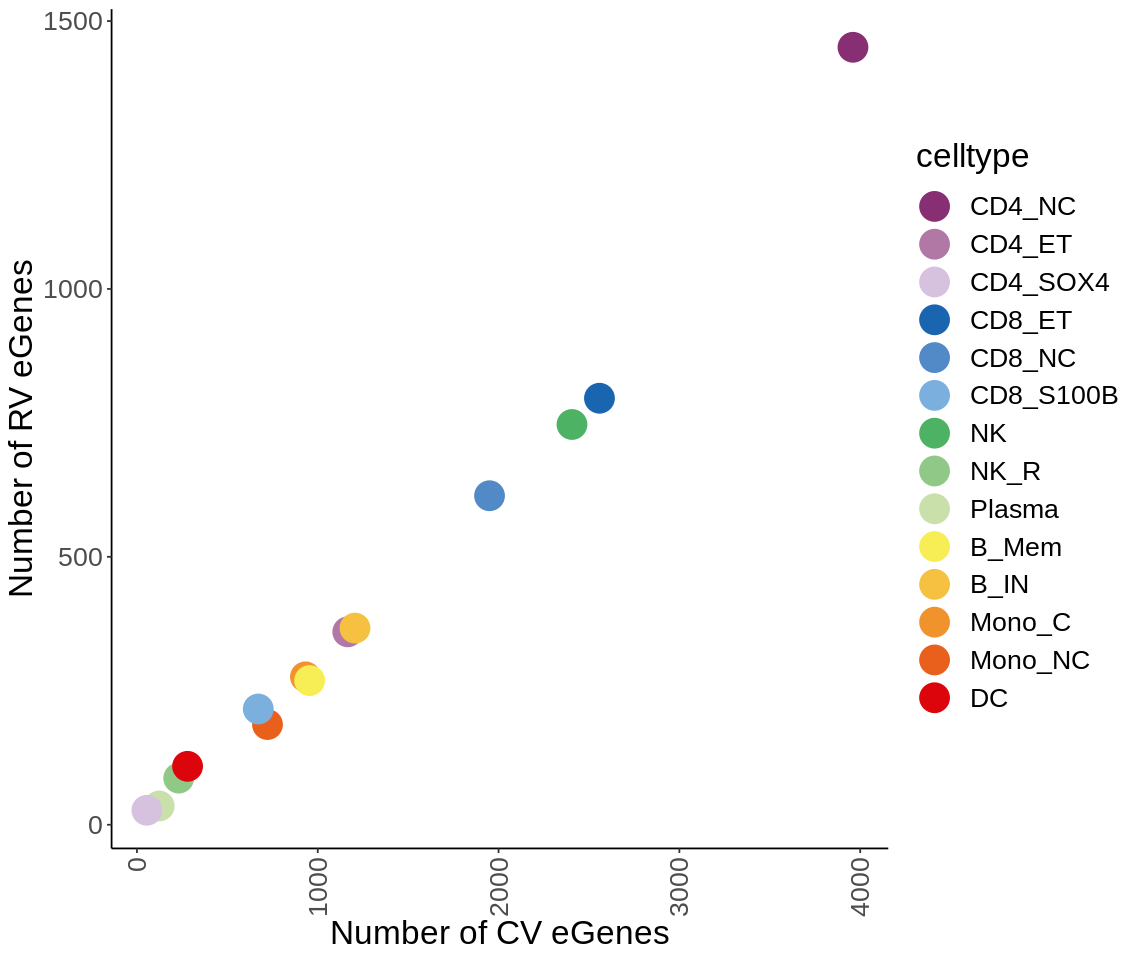

In [36]:
# plot
options(repr.plot.width = 9.5, repr.plot.height = 8)
p = ggplot(df_to_plot, aes(x=n_CV_eGenes, y=n_RV_eGenes, colour=celltype)) + geom_point(size=8)
p = p + theme_classic()
p = p + scale_colour_manual(values = df_colours$colours) + theme(text = element_text(size=20))
p = p + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
p = p + xlab("Number of CV eGenes") + ylab("Number of RV eGenes")
p

In [37]:
# save
fig_dir <- "/share/ScratchGeneral/anncuo/OneK1K/saige_eqtl/ms_figures/"
pdf(paste0(fig_dir,"CV_vs_RV_genes.pdf"), width=9.5, height=8)
p
dev.off()

png 
  2